In [4]:
#Importing Important Libraries
import matplotlib.pyplot as plt #ploting 
import seaborn as sns #simple graphs library
import pandas as pd 
import numpy as np
import os #handle specific files

In [2]:
#Reading Data
df = pd.read_csv('Iris.csv')
df.head()

,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Understanding Data
df.info() #checking datatypes & nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SepalLength(cm)  150 non-null    float64
 1   SepalWidth(cm)   150 non-null    float64
 2   PetalLength(cm)  150 non-null    float64
 3   PetalWidth(cm)   150 non-null    float64
 4   Species          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


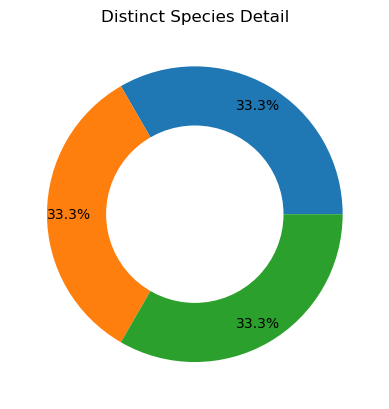

In [16]:
fig = plt.pie(df['Species'].value_counts(),autopct='%0.1f%%', pctdistance=0.85) #making piechart
centre_circle = plt.Circle((0, 0), 0.60, fc='white') #draw circle
fig = plt.gcf()
fig.gca().add_artist(centre_circle) #adding circle in piechart
plt.title('Distinct Species Detail') #labelling
plt.show()


In [7]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

<AxesSubplot:title={'center':'Sepal Length(cm)'}, xlabel='Length', ylabel='Count'>

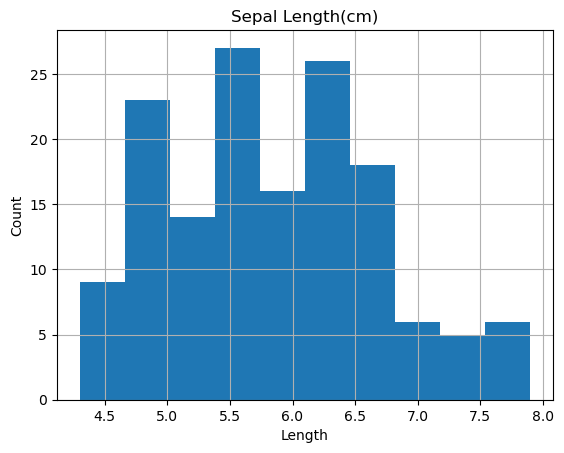

In [8]:
df['SepalLength(cm)']
plt.xlabel("Length")
plt.ylabel("Count")
plt.title('Sepal Length(cm)')  
df['SepalLength(cm)'].hist()

<AxesSubplot:title={'center':'Sepal Width(cm)'}, xlabel='Width', ylabel='Count'>

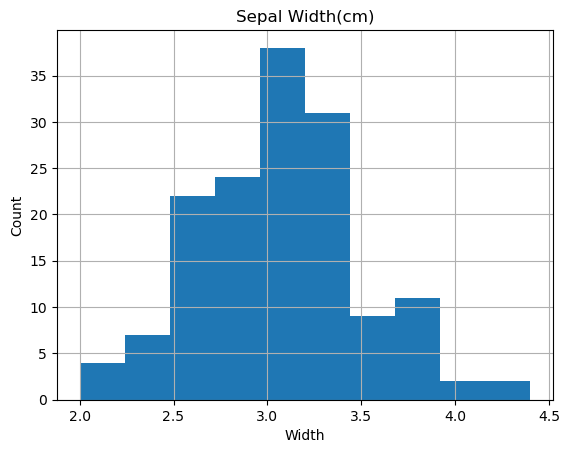

In [9]:
df['SepalWidth(cm)']
plt.xlabel("Width")
plt.ylabel("Count")
plt.title('Sepal Width(cm)')  
df['SepalWidth(cm)'].hist()

<AxesSubplot:title={'center':'Petal Width(cm)'}, xlabel='Width', ylabel='Count'>

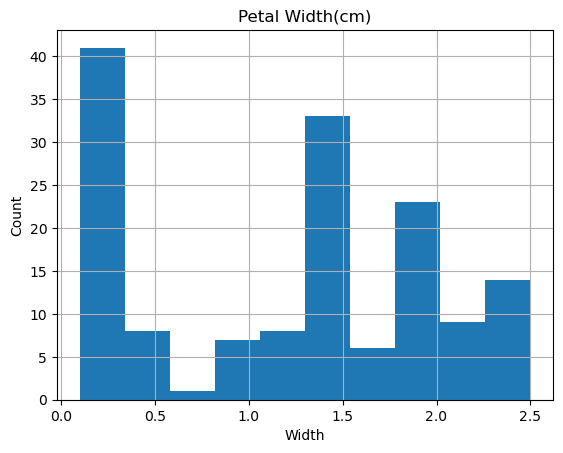

In [10]:
df['PetalWidth(cm)']
plt.xlabel("Width")
plt.ylabel("Count")
plt.title('Petal Width(cm)')  
df['PetalWidth(cm)'].hist()

<AxesSubplot:title={'center':'Petal Length(cm)'}, xlabel='Length', ylabel='Count'>

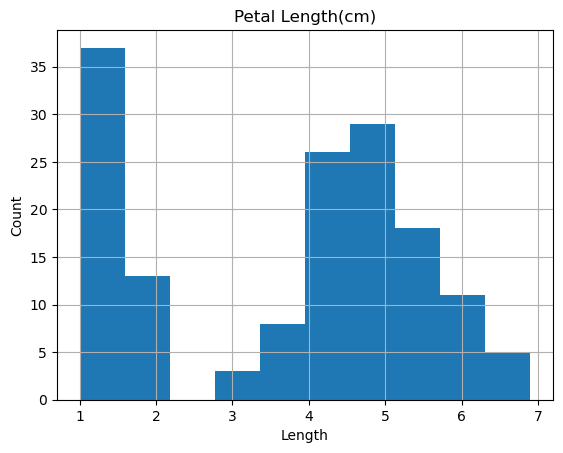

In [11]:
df['PetalLength(cm)']
plt.xlabel("Length")
plt.ylabel("Count")
plt.title('Petal Length(cm)')  
df['PetalLength(cm)'].hist()

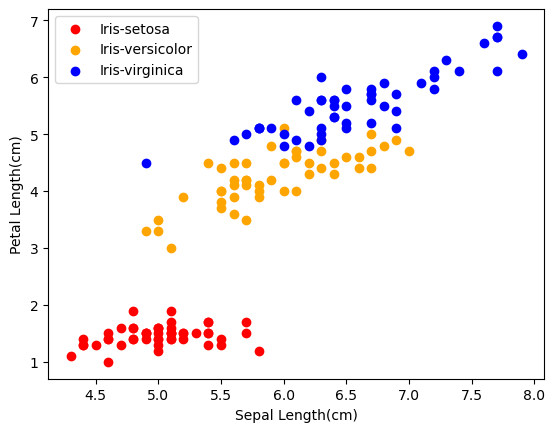

In [12]:
#scatterplot for Sepal & Petal Length
colors = ["red", "orange", "blue"]
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLength(cm)'], x['PetalLength(cm)'], c = colors[i], label = species[i])
  plt.xlabel("Sepal Length(cm)")
  plt.ylabel("Petal Length(cm)")
  plt.legend()

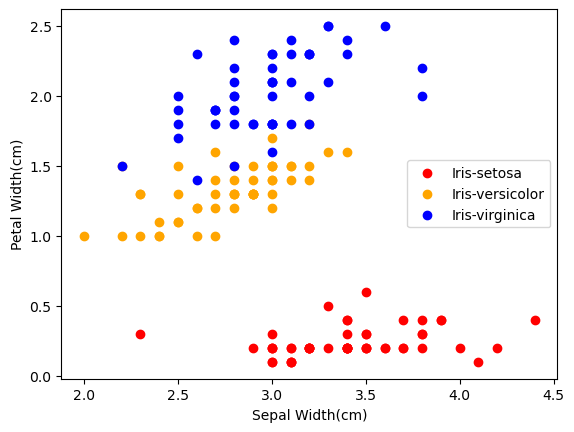

In [13]:
#scatterplot for Sepal & Petal Width
colors = ["red", "orange", "blue"]
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalWidth(cm)'], x['PetalWidth(cm)'], c = colors[i], label = species[i])
  plt.xlabel("Sepal Width(cm)")
  plt.ylabel("Petal Width(cm)")
  plt.legend()

In [14]:
df.corr()

,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm)
SepalLength(cm),1.000000,-0.109369,0.871754,0.817954
SepalWidth(cm),-0.109369,1.000000,-0.420516,-0.356544
PetalLength(cm),0.871754,-0.420516,1.000000,0.962757
PetalWidth(cm),0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

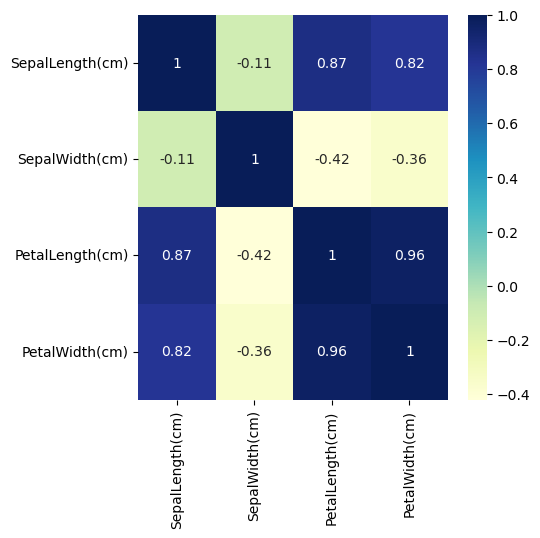

In [15]:
corr = df.corr()
fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax=ax, cmap = "YlGnBu" )

In [17]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
#String to Numeric
df['Species'] = le.fit_transform(df['Species']) 
df.head()

,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [54]:
from sklearn.model_selection import train_test_split
x = df.drop(columns = ['Species'])
y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 30)

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [56]:
model.fit(x_train,y_train)

LogisticRegression()

In [57]:
print("Accuracy", model.score(x_test,y_test))

Accuracy 1.0


In [58]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [59]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [60]:
print("Accuracy", model.score(x_test,y_test))

Accuracy 1.0


C:\Users\subu1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [61]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [62]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [63]:
print("Accuracy", model.score(x_test,y_test))

Accuracy 1.0
